# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
# Set display
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [3]:
DATA = Path('data')
!ls {DATA}

data_description.txt  features.txt  train.csv


# Structural EDA

In [4]:
# Read data

df = pd.read_csv(DATA/'train.csv')
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Feature Selection

features = ['LotArea', 'LotFrontage', 'GarageArea', 'YearBuilt', 'MSZoning', 'Utilities', 'BldgType', 'HouseStyle', 'OverallCond', 'KitchenQual', 'PoolQC', 'Neighborhood', 'CentralAir', 'SalePrice']
df2 = df[features] 
df2.head()

,LotArea,LotFrontage,GarageArea,YearBuilt,MSZoning,Utilities,BldgType,HouseStyle,OverallCond,KitchenQual,PoolQC,Neighborhood,CentralAir,SalePrice
0,8450,65.0,548,2003,RL,AllPub,1Fam,2Story,5,Gd,NaN,CollgCr,Y,208500
1,9600,80.0,460,1976,RL,AllPub,1Fam,1Story,8,TA,NaN,Veenker,Y,181500
2,11250,68.0,608,2001,RL,AllPub,1Fam,2Story,5,Gd,NaN,CollgCr,Y,223500
3,9550,60.0,642,1915,RL,AllPub,1Fam,2Story,5,Gd,NaN,Crawfor,Y,140000
4,14260,84.0,836,2000,RL,AllPub,1Fam,2Story,5,Gd,NaN,NoRidge,Y,250000


In [8]:
# Rename columns

df2.columns = ['area', 'street_length', 'garage_area', 'year', 'zone', 'utils', 'type', 'style', 'overall', 'kitchen', 'pool', 'hood', 'ac', 'price']
df2.head()

,area,street_length,garage_area,year,zone,utils,type,style,overall,kitchen,pool,hood,ac,price
0,8450,65.0,548,2003,RL,AllPub,1Fam,2Story,5,Gd,NaN,CollgCr,Y,208500
1,9600,80.0,460,1976,RL,AllPub,1Fam,1Story,8,TA,NaN,Veenker,Y,181500
2,11250,68.0,608,2001,RL,AllPub,1Fam,2Story,5,Gd,NaN,CollgCr,Y,223500
3,9550,60.0,642,1915,RL,AllPub,1Fam,2Story,5,Gd,NaN,Crawfor,Y,140000
4,14260,84.0,836,2000,RL,AllPub,1Fam,2Story,5,Gd,NaN,NoRidge,Y,250000


In [9]:
# Look at the data distribution

df2.describe(include='number')

,area,street_length,garage_area,year,overall,price
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,472.980137,1971.267808,5.575342,180921.195890
std,9981.264932,24.284752,213.804841,30.202904,1.112799,79442.502883
min,1300.000000,21.000000,0.000000,1872.000000,1.000000,34900.000000
25%,7553.500000,59.000000,334.500000,1954.000000,5.000000,129975.000000
50%,9478.500000,69.000000,480.000000,1973.000000,5.000000,163000.000000
75%,11601.500000,80.000000,576.000000,2000.000000,6.000000,214000.000000
max,215245.000000,313.000000,1418.000000,2010.000000,9.000000,755000.000000


In [10]:
df2.describe(include='object')

,zone,utils,type,style,kitchen,pool,hood,ac
count,1460,1460,1460,1460,1460,7,1460,1460
unique,5,2,5,8,4,3,25,2
top,RL,AllPub,1Fam,1Story,TA,Gd,NAmes,Y
freq,1151,1459,1220,726,735,3,225,1365


In [11]:
# Drop columns

df3 = df2.drop(labels=['pool', 'utils'], axis=1) 
df3.head()

,area,street_length,garage_area,year,zone,type,style,overall,kitchen,hood,ac,price
0,8450,65.0,548,2003,RL,1Fam,2Story,5,Gd,CollgCr,Y,208500
1,9600,80.0,460,1976,RL,1Fam,1Story,8,TA,Veenker,Y,181500
2,11250,68.0,608,2001,RL,1Fam,2Story,5,Gd,CollgCr,Y,223500
3,9550,60.0,642,1915,RL,1Fam,2Story,5,Gd,Crawfor,Y,140000
4,14260,84.0,836,2000,RL,1Fam,2Story,5,Gd,NoRidge,Y,250000


In [12]:
# Fix data types

df3.dtypes

area               int64
street_length    float64
garage_area        int64
year               int64
zone              object
type              object
style             object
overall            int64
kitchen           object
hood              object
ac                object
price              int64
dtype: object

In [13]:
# Fix types

df3 = df3.assign(**{c:pd.Categorical(df3[c]) for c in df3.select_dtypes('object').columns})
df3.dtypes

area                int64
street_length     float64
garage_area         int64
year                int64
zone             category
type             category
style            category
overall             int64
kitchen          category
hood             category
ac               category
price               int64
dtype: object

In [14]:
# Remove outliers

def iqr(df, c):
    return df[c].quantile(q=0.75) - df[c].quantile(q=0.25)

# Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR
def outlier_count(df, c):
    upper_bound = df[c].quantile(q=0.75) + 1.5 * iqr(df, c)
    lower_bound = df[c].quantile(q=0.25) - 1.5 * iqr(df, c)

    return len(df[df[c] > upper_bound]) + len(df[df[c] < lower_bound])

# Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR
def remove_outlier(df, c):
    upper_bound = df[c].quantile(q=0.75) + 1.5 * iqr(df, c)
    lower_bound = df[c].quantile(q=0.25) - 1.5 * iqr(df, c)
    
    return df[(df[c] <= upper_bound) & (df[c] >= lower_bound)]

In [15]:
for c in df3.select_dtypes('number'): print(f'{c}: {outlier_count(df3, c)}')

area: 69
street_length: 88
garage_area: 21
year: 7
overall: 125
price: 61


In [16]:
df4 = remove_outlier(remove_outlier(df3, 'price'), 'area')

In [17]:
clean_df = df4.copy()
clean_df.head()

,area,street_length,garage_area,year,zone,type,style,overall,kitchen,hood,ac,price
0,8450,65.0,548,2003,RL,1Fam,2Story,5,Gd,CollgCr,Y,208500
1,9600,80.0,460,1976,RL,1Fam,1Story,8,TA,Veenker,Y,181500
2,11250,68.0,608,2001,RL,1Fam,2Story,5,Gd,CollgCr,Y,223500
3,9550,60.0,642,1915,RL,1Fam,2Story,5,Gd,Crawfor,Y,140000
4,14260,84.0,836,2000,RL,1Fam,2Story,5,Gd,NoRidge,Y,250000


# Functional EDA

In [18]:
from functools import wraps
from datetime import datetime as dt


def log(fn):
    @wraps(fn)
    def _inner(*args, **kwargs):
        tic = dt.now()
        r = fn(*args, **kwargs)
        tac = dt.now()
        print(f'Shape: {r.shape}, Execution time: {((tac - tic).microseconds)/1000:.2f} ms, Function: {fn.__name__}')
        return r
    return _inner

# make copy
@log
def make_copy(df): 
    return df.copy()

# select features
@log
def select_features(df, features=None):
    return df[features]

# fix names
@log
def fix_names(df, d=None):
    return df.rename(columns=d)

# drop columns
@log
def drop_cols(df, cols=None):
    return df.drop(cols, axis=1)

# fix dtypes
@log
def fix_types(df):
    return df.assign(**{c:pd.Categorical(df[c]) for c in df.select_dtypes('object').columns})

In [19]:
features = ['LotArea', 'LotFrontage', 'GarageArea', 'YearBuilt', 'MSZoning', 'Utilities', 'BldgType', 
            'HouseStyle', 'OverallCond', 'KitchenQual', 'PoolQC', 'Neighborhood', 'CentralAir', 'SalePrice']

col_name = {
    'LotArea': 'area',
    'LotFrontage': 'street_len',
    'GarageArea': 'garage',
    'YearBuilt': 'year',
    'MSZoning': 'zone',
    'Utilities': 'utils',
    'BldgType': 'type',
    'HouseStyle': 'style',
    'OverallCond': 'condition',
    'KitchenQual': 'kitchen',
    'PoolQC': 'pool',
    'Neighborhood': 'hood',
    'CentralAir': 'ac',
    'SalePrice': 'price'
}

# col_type = {c:pd.Categorical(df[c]) for c in df.select_dtypes('object').columns}

clean_df = (df
  .pipe(make_copy)
  .pipe(select_features, features)
  .pipe(fix_names, col_name)
  .pipe(drop_cols, ['utils', 'pool'])
  .pipe(fix_types))

Shape: (1460, 81), Execution time: 0.73 ms, Function: make_copy
Shape: (1460, 14), Execution time: 1.61 ms, Function: select_features
Shape: (1460, 14), Execution time: 1.10 ms, Function: fix_names
Shape: (1460, 12), Execution time: 0.92 ms, Function: drop_cols
Shape: (1460, 12), Execution time: 8.21 ms, Function: fix_types


In [20]:
clean_df.head()

,area,street_len,garage,year,zone,type,style,condition,kitchen,hood,ac,price
0,8450,65.0,548,2003,RL,1Fam,2Story,5,Gd,CollgCr,Y,208500
1,9600,80.0,460,1976,RL,1Fam,1Story,8,TA,Veenker,Y,181500
2,11250,68.0,608,2001,RL,1Fam,2Story,5,Gd,CollgCr,Y,223500
3,9550,60.0,642,1915,RL,1Fam,2Story,5,Gd,Crawfor,Y,140000
4,14260,84.0,836,2000,RL,1Fam,2Story,5,Gd,NoRidge,Y,250000


## Exercise

Write a function to remove outliers from the DataFrame and add it to the processing pipeline using `pandas pipe`

In [21]:
# YOUR CODE GOES HERE

# Visualization in Pandas Dataframe

In [22]:
clean_df = (df
  .pipe(make_copy)
  .pipe(select_features, features)
  .pipe(fix_names, col_name)
  .pipe(drop_cols, ['utils', 'pool'])
  .pipe(fix_types))

hood_df = (clean_df
    .sort_values(['hood', 'year'])
    .groupby('hood')
    .agg({'area': 'mean', 'price': 'mean'})
)

Shape: (1460, 81), Execution time: 0.98 ms, Function: make_copy
Shape: (1460, 14), Execution time: 1.15 ms, Function: select_features
Shape: (1460, 14), Execution time: 0.74 ms, Function: fix_names
Shape: (1460, 12), Execution time: 0.70 ms, Function: drop_cols
Shape: (1460, 12), Execution time: 4.84 ms, Function: fix_types


In [23]:
hood_df

,area,price
hood,,
Blmngtn,3398.176471,194870.882353
Blueste,1625.000000,137500.000000
BrDale,1801.000000,104493.750000
BrkSide,7360.413793,124834.051724
ClearCr,30875.750000,212565.428571
CollgCr,9619.146667,197965.773333
Crawfor,11809.686275,210624.725490
Edwards,10218.650000,128219.700000
Gilbert,11379.151899,192854.506329


## Format text

[Format Options in Python](https://realpython.com/python-formatted-output/)

In [24]:
(hood_df
    .style
    .format({'price': '${:,.2f}'})
)

,area,price
hood,,
Blmngtn,3398.176471,"$194,870.88"
Blueste,1625.000000,"$137,500.00"
BrDale,1801.000000,"$104,493.75"
BrkSide,7360.413793,"$124,834.05"
ClearCr,30875.750000,"$212,565.43"
CollgCr,9619.146667,"$197,965.77"
Crawfor,11809.686275,"$210,624.73"
Edwards,10218.650000,"$128,219.70"
Gilbert,11379.151899,"$192,854.51"


## Style text

In [28]:
q25 = hood_df.price.quantile(q=0.25)
q75 = hood_df.price.quantile(q=0.75)
box = q75 - q25
L, U = q25 - 1.25 * box, q75 + 1.25 * box

(hood_df
     .style
     .format({'price': '${:,.2f}'}, subset='price')
     .applymap(lambda x: 'color: blue' if (x <= U and x >= L) else 'color: red', subset='price')
)

,area,price
hood,,
Blmngtn,3398.176471,"$194,870.88"
Blueste,1625.000000,"$137,500.00"
BrDale,1801.000000,"$104,493.75"
BrkSide,7360.413793,"$124,834.05"
ClearCr,30875.750000,"$212,565.43"
CollgCr,9619.146667,"$197,965.77"
Crawfor,11809.686275,"$210,624.73"
Edwards,10218.650000,"$128,219.70"
Gilbert,11379.151899,"$192,854.51"


## Highlight cells & draw bars

In [29]:
(hood_df
    .style
    .format({
        'price': '${:,.2f}'
    })
    .background_gradient(subset=['price'], cmap='YlGnBu', high=0.5, low=0.)
    .bar(subset=['area'])
    .highlight_min(color='tomato')
    .highlight_max(color='orange')
)

,area,price
hood,,
Blmngtn,3398.176471,"$194,870.88"
Blueste,1625.000000,"$137,500.00"
BrDale,1801.000000,"$104,493.75"
BrkSide,7360.413793,"$124,834.05"
ClearCr,30875.750000,"$212,565.43"
CollgCr,9619.146667,"$197,965.77"
Crawfor,11809.686275,"$210,624.73"
Edwards,10218.650000,"$128,219.70"
Gilbert,11379.151899,"$192,854.51"


## Exercise

Format the area column & add a background gradient
- 3398.176471 -> 3398 sq.ft

In [30]:
# YOUR CODE GOES HERE

# Matplotlib

In [31]:
plt.style.use('ggplot')
# plt.style.use('seaborn-pastel')

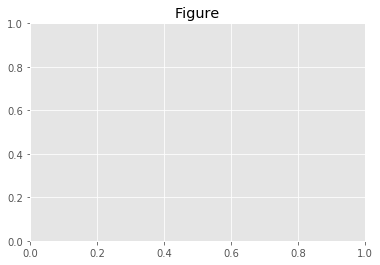

In [32]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set(title='Figure')
plt.show()

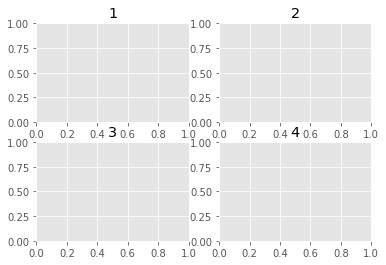

In [33]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set(title='1')

ax2 = fig.add_subplot(222)
ax2.set(title='2')

ax3 = fig.add_subplot(223)
ax3.set(title='3')

ax4 = fig.add_subplot(224)
ax4.set(title='4')

plt.show()

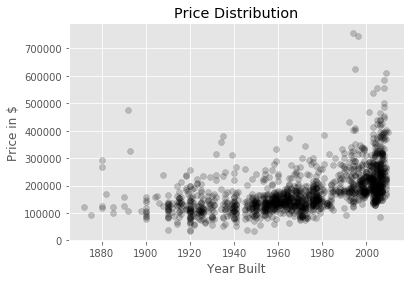

In [34]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(clean_df.year, clean_df.price, color='k', alpha=0.2)
ax.set(xlabel='Year Built', ylabel='Price in $', title='Price Distribution')
plt.show()

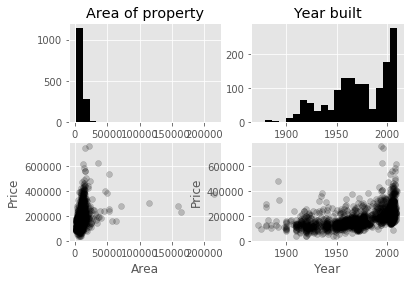

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].hist(clean_df.area, bins=20, color='k')
axes[0,0].set_title('Area of property')

axes[0,1].hist(clean_df.year, bins=20, color='k')
axes[0,1].set_title('Year built')

axes[1,0].scatter(clean_df.area, clean_df.price, color='k', alpha=0.2)
axes[1,0].set(xlabel='Area', ylabel='Price')

axes[1,1].scatter(clean_df.year, clean_df.price, color='k', alpha=0.2)
axes[1,1].set(xlabel='Year', ylabel='Price')

plt.show()

## Exercise

Create a Scatter plot between Garage ~ Price

In [37]:
# YOUR CODE GOES HERE

# Seaborn

## Continuous data

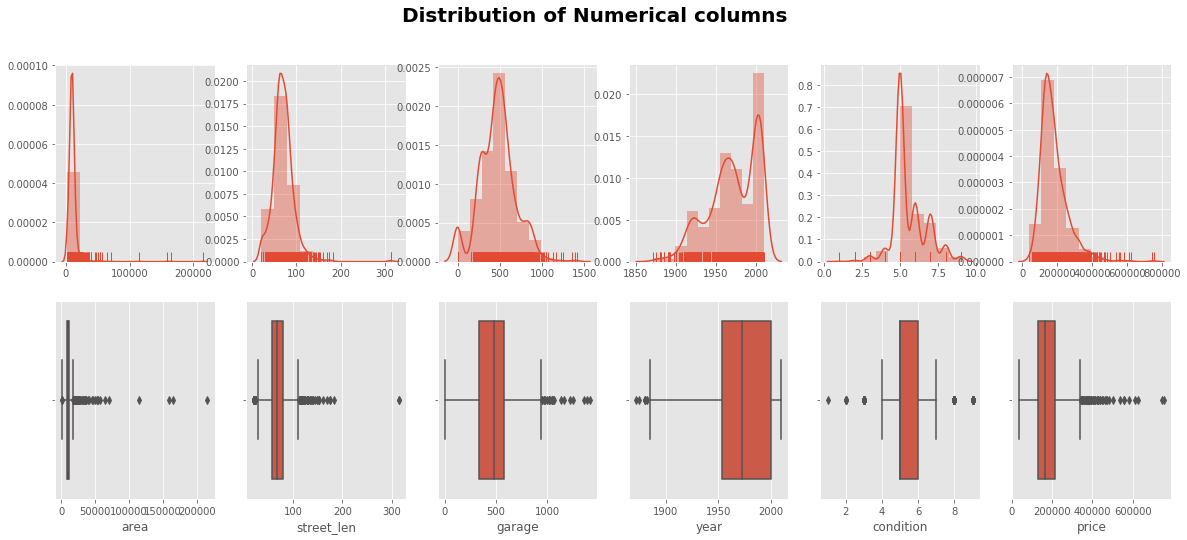

In [40]:
from itertools import product, repeat, chain

ROW = 2
COL = 6

fig, axes = plt.subplots(nrows=ROW, ncols=COL, figsize=(20,8))
for ((i,j), c) in zip(product(range(ROW), range(COL)), 
                      chain.from_iterable(repeat(clean_df.select_dtypes('number').columns, 2))):
    if i == 0:
        sns.distplot(clean_df[c],
                     bins=10,
                     rug=True,
                     kde=True,
                     ax=axes[i,j])
        axes[i,j].set_xlabel('')
    else:
        sns.boxplot(clean_df[c], orient='h', ax=axes[i,j])
    
fig.suptitle('Distribution of Numerical columns', fontsize=20, fontweight='bold')
plt.show()

## Categorical Data

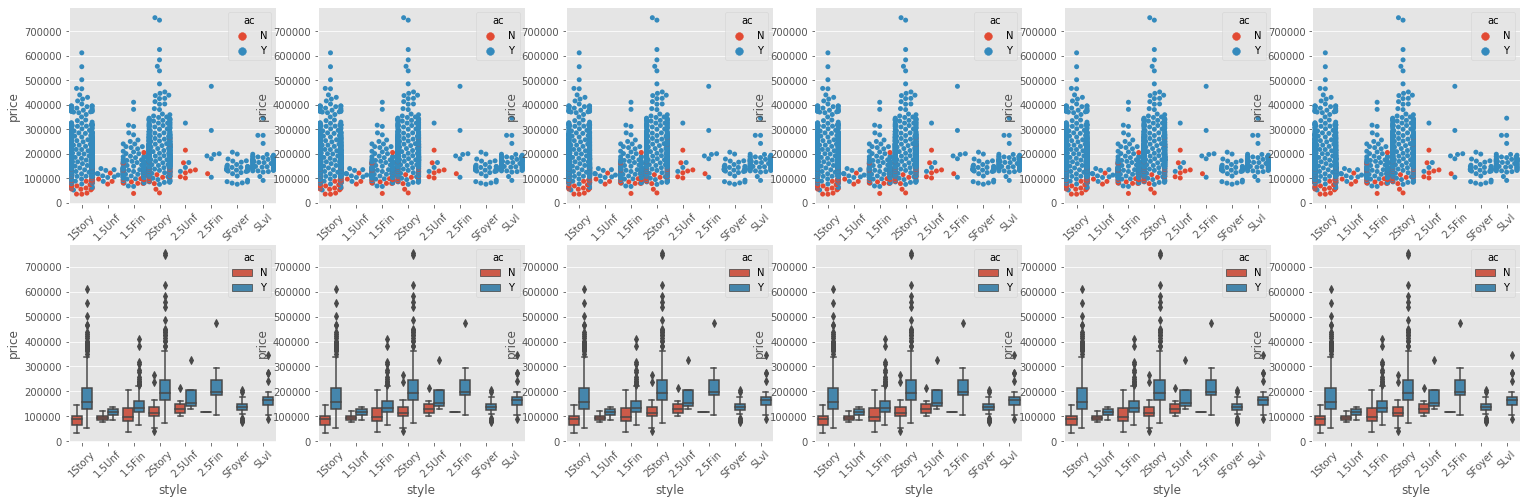

In [42]:
ROW = 2
COL = 6

fig, axes = plt.subplots(nrows=ROW, ncols=COL, figsize=(26,8))
for ((i,j), c) in zip(product(range(ROW), range(COL)), 
                      chain.from_iterable(repeat(clean_df.select_dtypes('number').columns, 2))):
    if i == 0:
        sns.swarmplot(x='style', y='price', hue='ac', 
                      order=['1Story', '1.5Unf', '1.5Fin', '2Story', '2.5Unf', '2.5Fin', 'SFoyer', 'SLvl'], 
                      data=clean_df, 
                      ax=axes[i,j])
        axes[i,j].set_xlabel('')
        axes[i,j].set_xticklabels(labels=axes[i,j].get_xticklabels(), rotation='45')
    else:
        sns.boxplot(x='style', y='price', hue='ac', 
                    order=['1Story', '1.5Unf', '1.5Fin', '2Story', '2.5Unf', '2.5Fin', 'SFoyer', 'SLvl'], 
                    data=clean_df, 
                    ax=axes[i,j])
        axes[i,j].set_xticklabels(labels=axes[i,j].get_xticklabels(), rotation='45')

## Exercise

Create a swarm plot between hood ~ area of the plot

In [43]:
# YOUR CODE GOES HERE

## Bivariate distribution

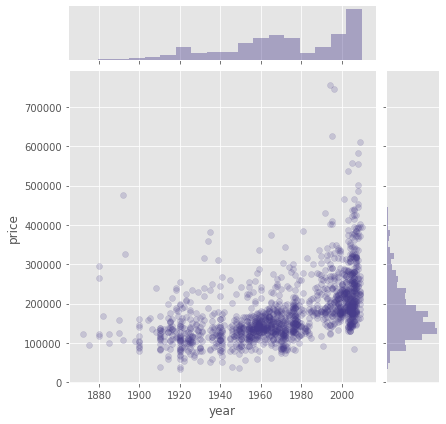

In [44]:
sns.jointplot(x='year', y='price', data=clean_df, color='darkslateblue', alpha=0.2)

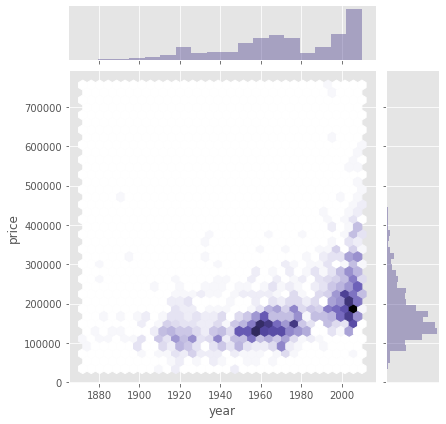

In [45]:
sns.jointplot(x='year', y='price', data=clean_df, kind='hex', color='darkslateblue')

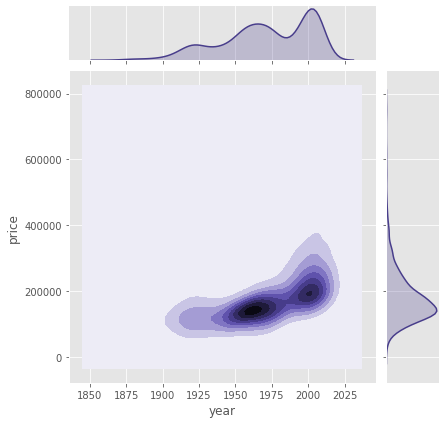

In [46]:
sns.jointplot(x='year', y='price', data=clean_df, kind='kde', color='darkslateblue')

/home/srm/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/srm/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/srm/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/srm/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


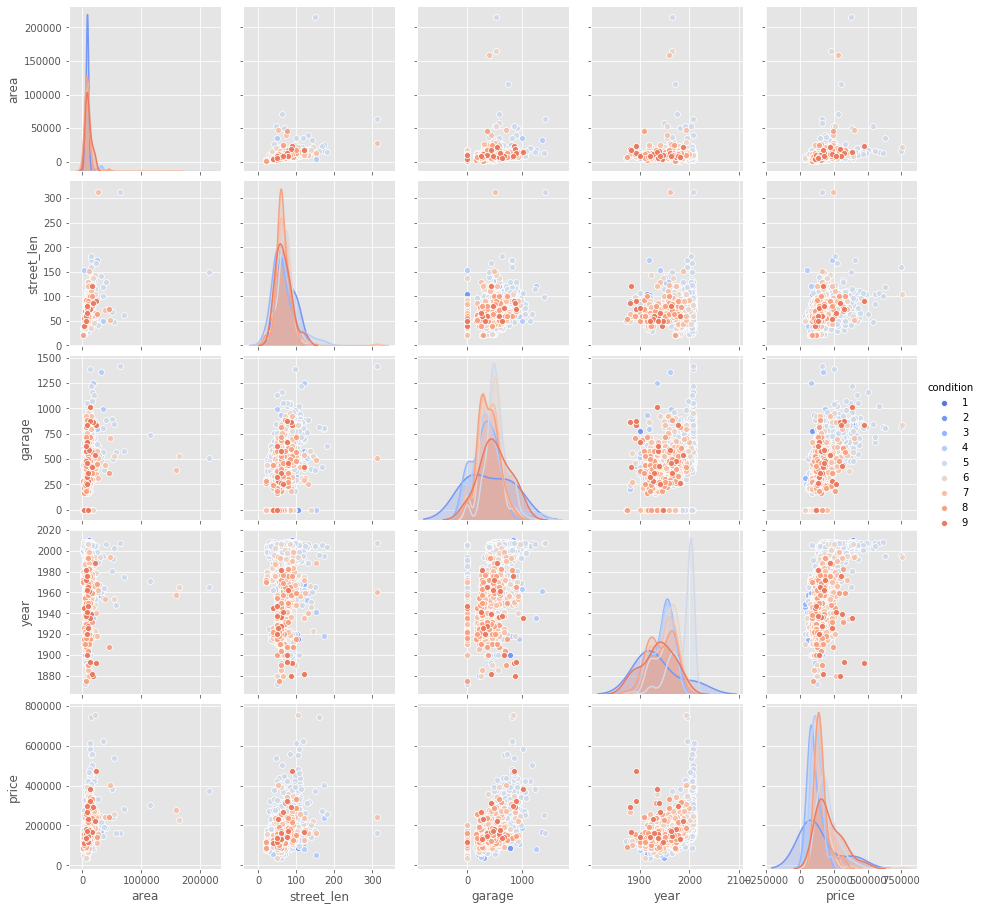

In [47]:
sns.pairplot(clean_df, hue='condition', palette=sns.color_palette('coolwarm', n_colors=10))

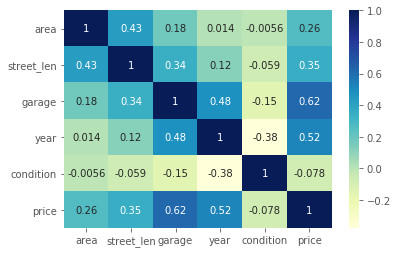

In [48]:
sns.heatmap(clean_df.corr(), cmap='YlGnBu', annot=True)